In [11]:
import sys
import time
import random
import math
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from copy import deepcopy
import glob

# Load Data

In [6]:
df = pd.DataFrame()
for file_name in glob.glob('outputs/'+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False, sep="\t")
    df = pd.concat([df, x], axis=0)
    
df

,Method,Vars,Ordering,Query,Evidence,Runtime
0,MAP,11,random,['Blurry Vision'],"{'Headache': True, 'Diabetes': True, 'High Blo...",1.332572
1,MAP,11,random,['Blurry Vision'],"{'Headache': True, 'Diabetes': True, 'High Blo...",1.469528
2,MAP,11,random,['Blurry Vision'],"{'Headache': True, 'Diabetes': True, 'High Blo...",1.377561
3,MAP,11,mindeg,['Blurry Vision'],"{'Headache': True, 'Diabetes': True, 'High Blo...",0.741775
4,MAP,11,mindeg,['Blurry Vision'],"{'Headache': True, 'Diabetes': True, 'High Blo...",0.737745
...,...,...,...,...,...,...
4,MPE,5,mindeg,NaN,{'hear-bark': 'false'},0.088977
5,MPE,5,mindeg,NaN,{'hear-bark': 'false'},0.087984
6,MPE,5,minfill,NaN,{'hear-bark': 'false'},0.087000
7,MPE,5,minfill,NaN,{'hear-bark': 'false'},0.084002


In [7]:
df_map = df[df.Method == "MAP"]
df_map

,Method,Vars,Ordering,Query,Evidence,Runtime
0,MAP,11,random,['Blurry Vision'],"{'Headache': True, 'Diabetes': True, 'High Blo...",1.332572
1,MAP,11,random,['Blurry Vision'],"{'Headache': True, 'Diabetes': True, 'High Blo...",1.469528
2,MAP,11,random,['Blurry Vision'],"{'Headache': True, 'Diabetes': True, 'High Blo...",1.377561
3,MAP,11,mindeg,['Blurry Vision'],"{'Headache': True, 'Diabetes': True, 'High Blo...",0.741775
4,MAP,11,mindeg,['Blurry Vision'],"{'Headache': True, 'Diabetes': True, 'High Blo...",0.737745
...,...,...,...,...,...,...
4,MAP,5,mindeg,['hear-bark'],{'dog-out': 'true'},0.070988
5,MAP,5,mindeg,['hear-bark'],{'dog-out': 'true'},0.071006
6,MAP,5,minfill,['hear-bark'],{'dog-out': 'true'},0.077987
7,MAP,5,minfill,['hear-bark'],{'dog-out': 'true'},0.077004


In [9]:
df_mpe = df[df.Method == "MPE"]
df_mpe

,Method,Vars,Ordering,Query,Evidence,Runtime
0,MPE,11,random,NaN,{'Blurry Vision': True},2.327272
1,MPE,11,random,NaN,{'Blurry Vision': True},0.977724
2,MPE,11,random,NaN,{'Blurry Vision': True},3.956720
3,MPE,11,mindeg,NaN,{'Blurry Vision': True},0.783767
4,MPE,11,mindeg,NaN,{'Blurry Vision': True},0.765767
...,...,...,...,...,...,...
4,MPE,5,mindeg,NaN,{'hear-bark': 'false'},0.088977
5,MPE,5,mindeg,NaN,{'hear-bark': 'false'},0.087984
6,MPE,5,minfill,NaN,{'hear-bark': 'false'},0.087000
7,MPE,5,minfill,NaN,{'hear-bark': 'false'},0.084002


# Plots

In [51]:
# Plot style
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.25)
sns.set_style("white")
plt.rcParams['ytick.left'] = True

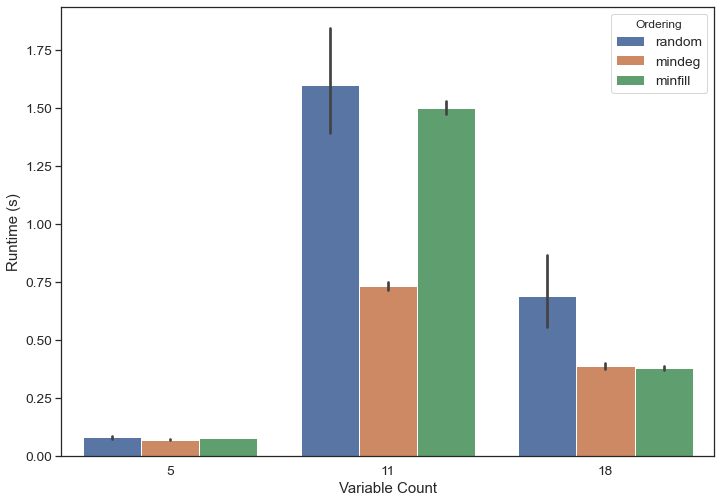

In [56]:
# MAP
ax = sns.barplot(data=df_map, x="Vars", y="Runtime", hue="Ordering")
ax.set(xlabel="Variable Count", ylabel="Runtime (s)")
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

fig = ax.get_figure()
fig.savefig('outputs/map.pdf', bbox_inches='tight')

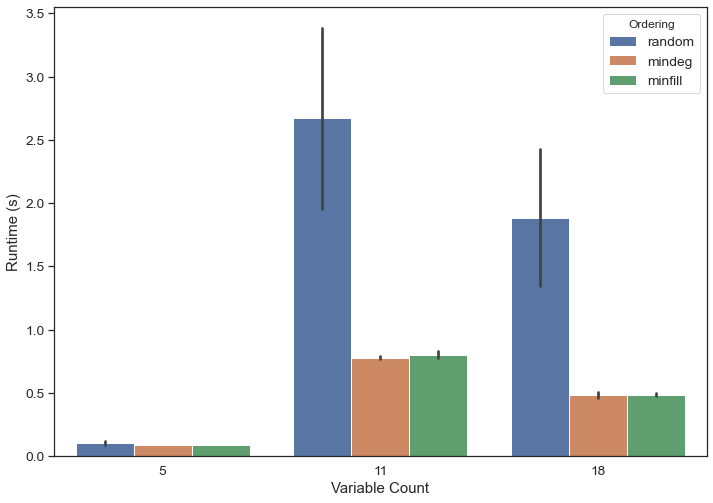

In [57]:
# MPE
ax = sns.barplot(data=df_mpe, x="Vars", y="Runtime", hue="Ordering")
ax.set(xlabel="Variable Count", ylabel="Runtime (s)")
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

fig = ax.get_figure()
fig.savefig('outputs/mpe.pdf', bbox_inches='tight')